5.4 Exercises
Conceptual
1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that α given by
(5.6) does indeed minimize Var(αX + (1 − α)Y ).

<img src="images/ch05_1.jpg" alt="equation" width="600">

2. We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.
(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

- (n-1) /n, holding out jth observation we have n-1 observation to choose.

(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

- (n-1) / n, because again we can choose the same observations when we allow replacement.

(c) Argue that the probability that the jth observation is not in the
bootstrap sample is (1 − 1/n)^n.

- Probability that jth observation not first observation in bootstrap sample is (n-1)/n, not second observation is (n-1)/n. (n-1)/n * (n-1)/n * .... (n-1)/n (n times). ((n-1)/n)^n

(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?

- 67.2%

In [1]:
n = 5
prob = 1 - ((n-1) / n)**n
prob 

0.6723199999999999

(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?

- 63.4%

In [2]:
n = 100
prob = 1 - ((n-1) / n)**n
prob

0.6339676587267709

(f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?

- 63.2%

In [3]:
n = 10000
prob = 1 - ((n-1) / n)**n
prob

0.6321389535670295

(g) Create a plot that displays, for each integer value of n from 1
to 100, 000, the probability that the jth observation is in the
bootstrap sample. Comment on what you observe.

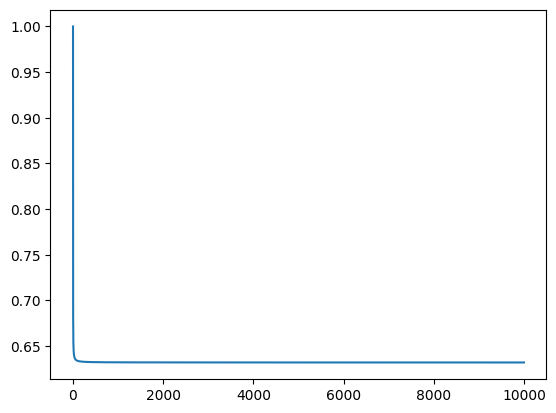

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1,10000)
y = 1 - ((x-1) / x)**x
plt.plot(x,y)


(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here
j = 4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record
whether or not the fifth observation is contained in the bootstrap
sample. Comment on the results obtained.

- It can be seen that probability that we calculated is similar to we simulated. 

In [25]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100,size=100, replace=True) == 4) > 0
np.mean(store)

0.6362

3. We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.

- K-fold cv is implemented by dividing the sample set into equal subsets or folds, then using each set to validate the model while using other sets as training sets. 

(b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
i. The validation set approach?
ii. LOOCV?

- i: k-fold cv involves using every observation as training, and validation set, whereas the validation set approach involves selecting a partial set to train and validate. Therefore validition set approach can introduce more bias compared to k-fold cv. K-fold cv is more computationally expensive.

- ii: LOOCV have higher variance, whereas k-fold cv has lower variance, and also LOOCV is computationally expensive compared to k-fold cv. 

4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.

- We can use bootstrap method which shows us the uncertainty between estimator X and response Y. Also there is noise which is coming from residuals of our model, which should be added to standart deviation of the model predictions which is coming from boostrap method.